In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='latin')

In [3]:
df.sample(5)

,v1,v2
3488,ham,I'm also came to room.
4317,ham,S...i will take mokka players only:)
2827,ham,Wife.how she knew the time of murder exactly
3484,ham,No:-)i got rumour that you going to buy apartm...
2269,ham,Haha i think i did too


In [4]:
df.shape

(5572, 2)

1.data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [7]:
df.sample(5)

,target,message
1076,ham,Where can download clear movies. Dvd copies.
2913,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
4902,ham,"\I;m reaching in another 2 stops.\"""""
4933,ham,Hey do you want anything to buy:)
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,target,message
4776,0,Sorry completely forgot * will pop em round th...
1499,1,"SMS. ac JSco: Energy is high, but u may not kn..."
953,0,Also remember to get dobby's bowl from your car
1909,0,Then u going ikea str aft dat?
5127,0,Cuz ibored. And don wanna study


In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
df.duplicated().sum()

401

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5171, 2)

2.EDA

In [16]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar then Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4518
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

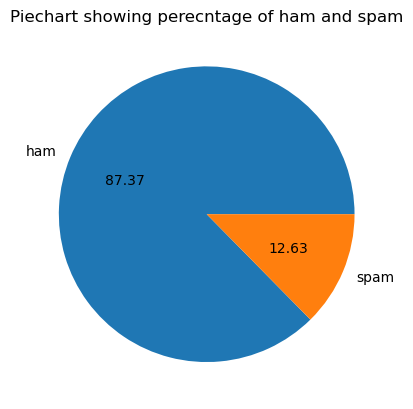

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.title("Piechart showing perecntage of ham and spam")
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mruh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_charecters']=df['message'].apply(len)

In [23]:
df.sample(5)

,target,message,num_charecters
1867,0,Mmmm ... Fuck ... Not fair ! You know my weakn...,183
5472,0,Well obviously not because all the people in m...,79
5532,0,happened here while you were adventuring,40
1109,0,S s..first time..dhoni rocks...,31
3765,0,Yes.mum lookin strong:),23


In [24]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.sample(5)

,target,message,num_charecters,num_words
666,0,Carlos'll be here in a minute if you still nee...,54,13
297,0,Hurt me... Tease me... Make me cry... But in t...,153,39
1960,1,Guess what! Somebody you know secretly fancies...,156,29
647,1,PRIVATE! Your 2003 Account Statement for shows...,136,23
2642,0,"They can try! They can get lost, in fact. Tee hee",49,14


In [26]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
3160,0,Mystery solved! Just opened my email and he's ...,87,20,3
2961,0,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""""",44,9,1
3915,0,Ok. C u then.,13,5,1
4283,0,Yes. I come to nyc for audiitions and am tryin...,60,14,2
2301,0,"&lt;#&gt; , that's all? Guess that's easy enough",48,17,2


In [28]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,79.591568,18.606652,1.974280
std,58.591487,13.424824,1.466029
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#ham messages
df[df['target']==0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,71.131253,17.287074,1.829128
std,56.861084,13.618450,1.404481
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam messages
df[df['target']==1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.00000
mean,138.127106,27.736600,2.97856
std,29.910358,6.976813,1.49010
min,13.000000,2.000000,1.00000
25%,132.000000,25.000000,2.00000
50%,149.000000,29.000000,3.00000
75%,157.000000,32.000000,4.00000
max,224.000000,46.000000,9.00000


<Axes: xlabel='num_charecters', ylabel='Count'>

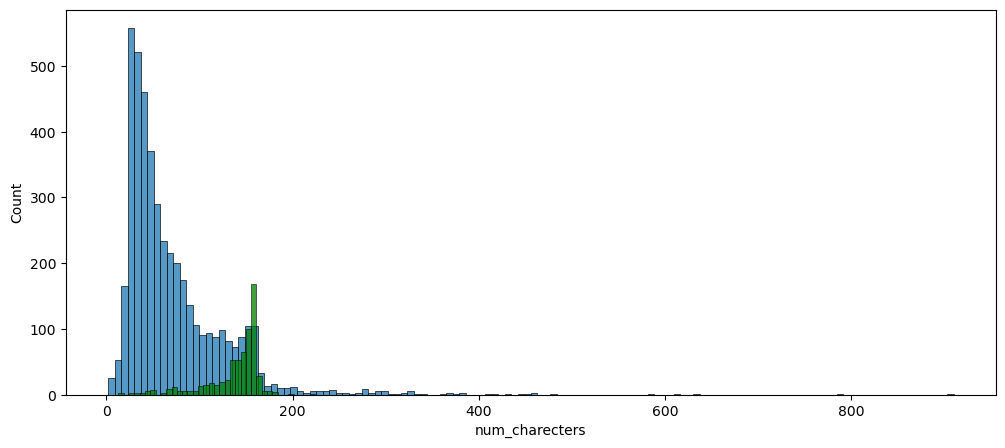

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

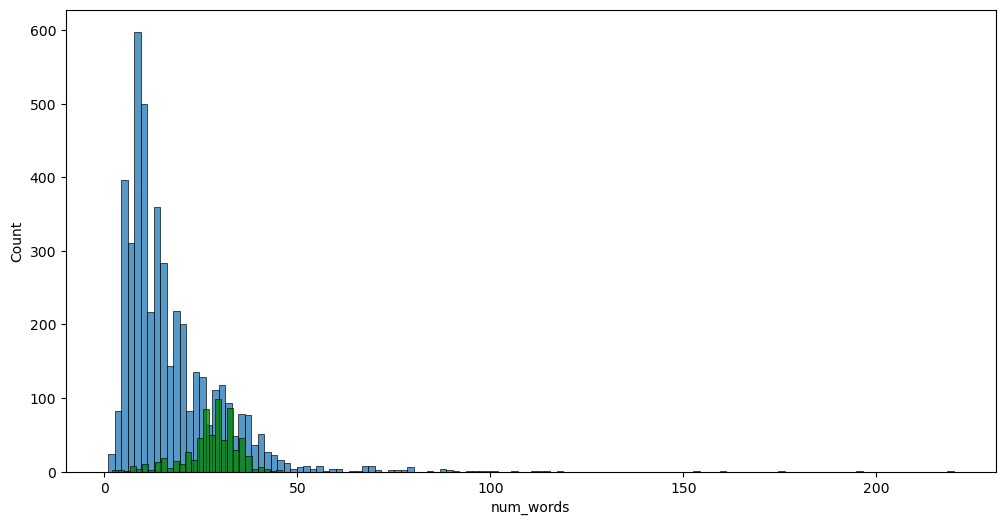

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

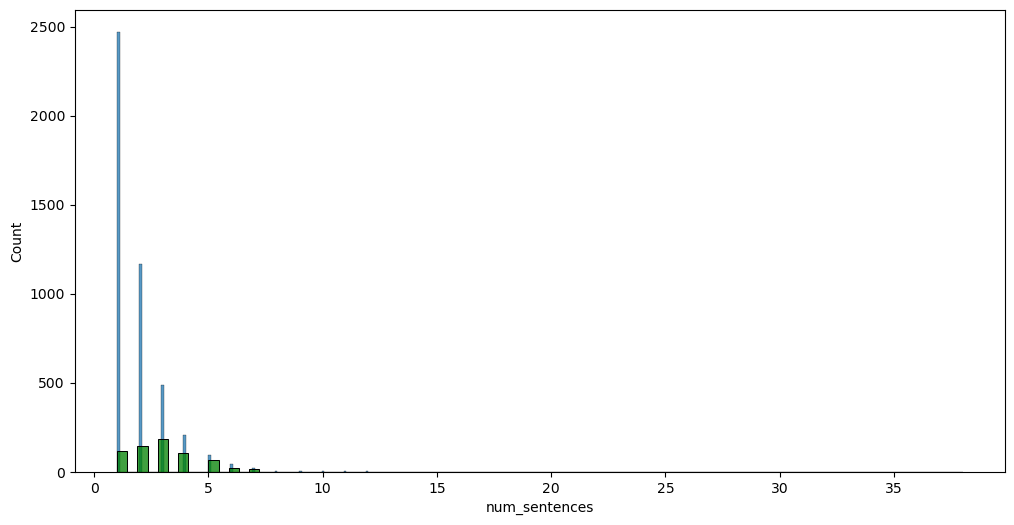

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='green')

c:\Users\mruh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


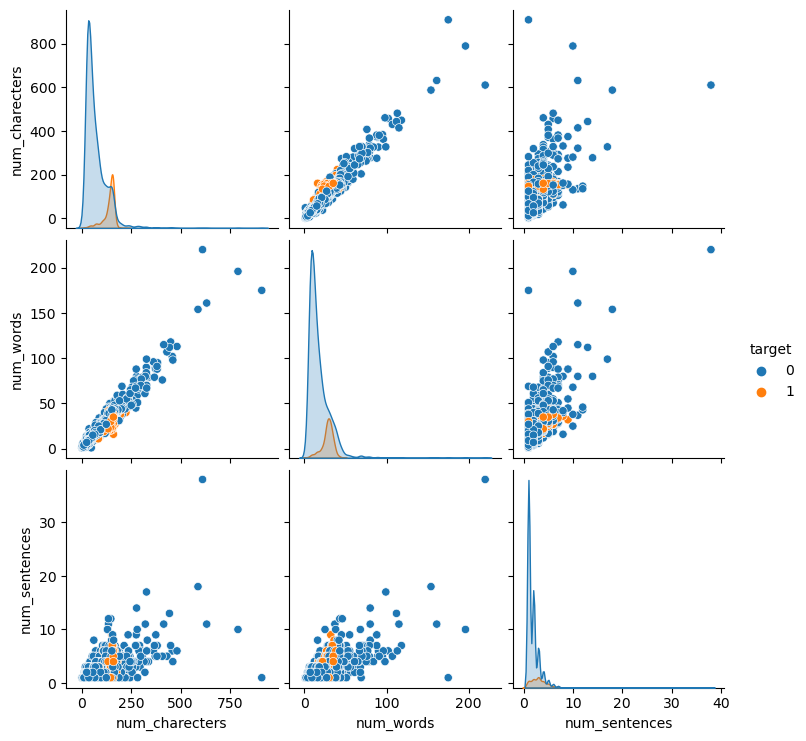

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

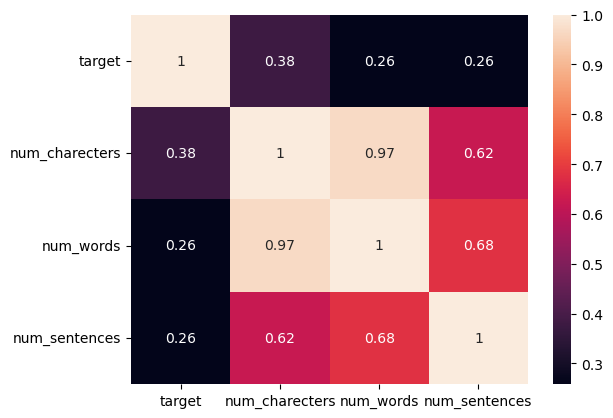

In [35]:
sns.heatmap(df[['target','num_charecters','num_words','num_sentences']].corr(),annot=True)

3.Data preprocessing

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mruh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
ps=PorterStemmer()

In [39]:
def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for j in message:
        y.append(ps.stem(j))
    
            
    return " ".join(y)



In [40]:
transform_text("i am talking to you")

'talk'

In [41]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences
535,0,"Good afternoon, my love! How goes that day ? I...",160,38,4
2701,0,"Hiya, sorry didn't hav signal. I haven't seen ...",169,43,4
1150,0,(That said can you text him one more time?),43,12,1
3835,0,Then Ì_ come n pick me at 530 ar?,33,10,1
4826,0,Yup but it's not giving me problems now so may...,68,17,1


In [42]:
df['transform_text']=df['message'].apply(transform_text)

In [43]:
df.head()

,target,message,num_charecters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar then Joking wif u oni,30,7,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

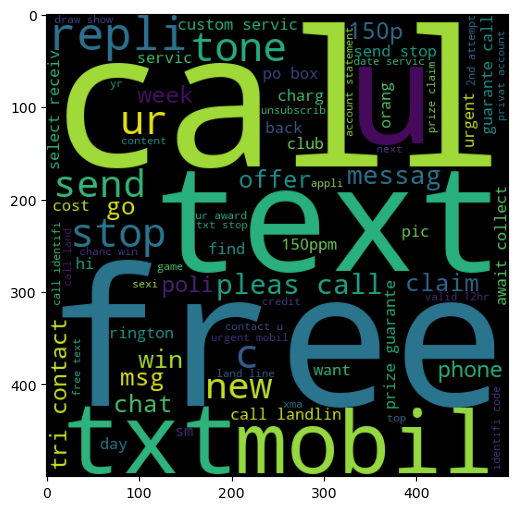

In [46]:
#spam messages display
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

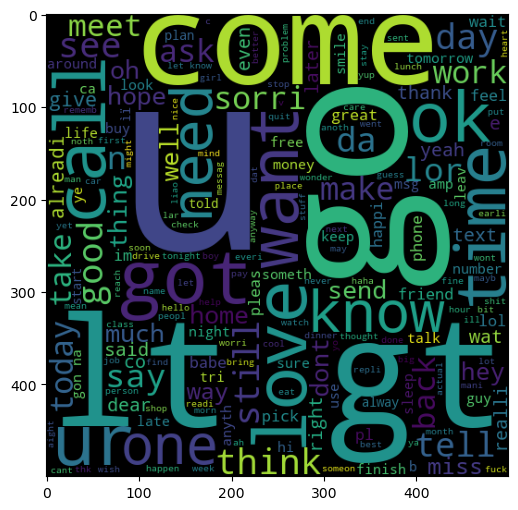

In [47]:
#ham messages display
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.sample(5)

,target,message,num_charecters,num_words,num_sentences,transform_text
4159,0,i felt so...not any conveying reason.. Ese he....,63,16,1,felt convey reason ese
827,0,Hey. You got any mail?,22,7,2,hey got mail
4129,0,And by when you're done I mean now,34,9,1,done mean
275,0,Thanx...,8,2,1,thanx
5094,0,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",120,22,2,hi shanil rakhesh exchang uncut diamond back e...


In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
len(spam_corpus)

9959

In [50]:
from collections import Counter

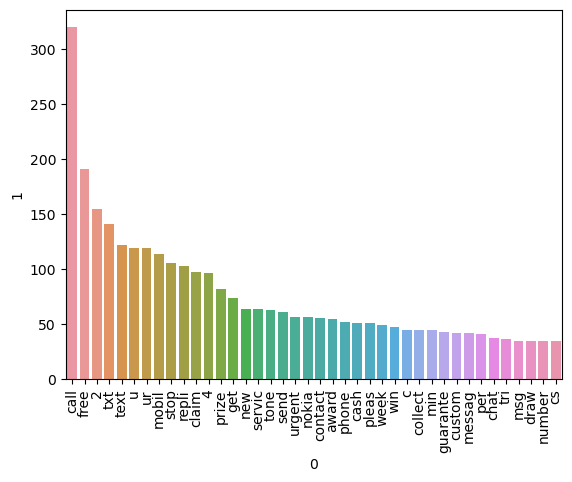

In [51]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

35758

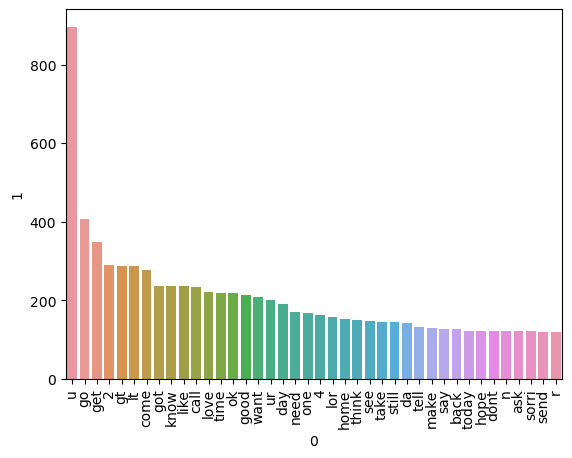

In [53]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(40))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [55]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [57]:
x.shape

(5171, 3000)

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [63]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [64]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8714975845410629
[[792 111]
 [ 22 110]]
0.497737556561086


In [65]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.978743961352657
[[897   6]
 [ 16 116]]
0.9508196721311475


Importing Pickle

In [66]:
import pickle
pickle.dump(tfidf,open('tfidfvectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))